# Dylan Tan

# 1004385

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd
%cd /content/drive/MyDrive/Term\ 6/CDS
!ls

/content
/content/drive/MyDrive/Term 6/CDS
 chicago_hotel_reviews.csv  'Lab 2 - Intro_to_pandas.ipynb'
 data.csv		    'Lab 3a - data handling (questions)'
 eigenfaces.py		    'Lab 3b - visualisation (questions) 2020'
'Lab 1 - Hadoop MapReduce'  'Lab 4 - Regression.ipynb'
'Lab 2 - eigenfaces.ipynb'   PyTorchBasics.ipynb


# Exercise 1

In [3]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("data.csv", names=["X","Y"])

print(dataframe)

            X          Y
0   32.502345  31.707006
1   53.426804  68.777596
2   61.530358  62.562382
3   47.475640  71.546632
4   59.813208  87.230925
..        ...        ...
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958
99  25.128485  53.454394

[100 rows x 2 columns]


In [4]:
X = dataframe.iloc[:,0]
Y = dataframe.iloc[:,1]

print(X)
print(Y)

0     32.502345
1     53.426804
2     61.530358
3     47.475640
4     59.813208
        ...    
95    50.030174
96    49.239765
97    50.039576
98    48.149859
99    25.128485
Name: X, Length: 100, dtype: float64
0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
        ...    
95    81.536991
96    72.111832
97    85.232007
98    66.224958
99    53.454394
Name: Y, Length: 100, dtype: float64


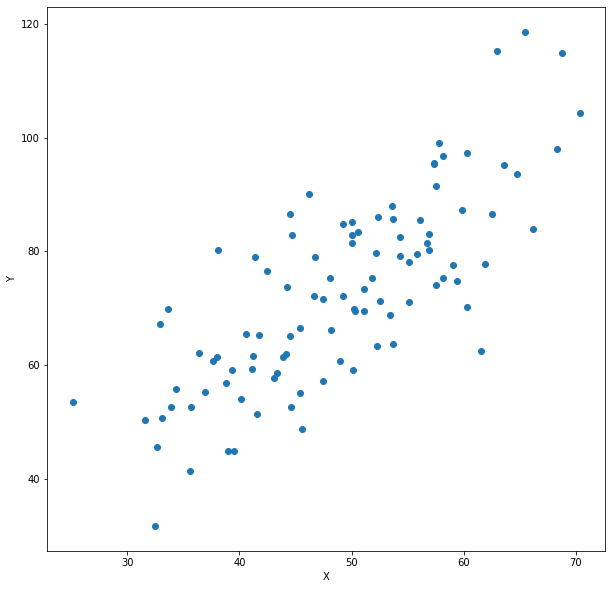

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
Y_bar = sum(Y)/ len(Y)
print(f"Y bar is: {Y_bar}")

x_bar = sum(X)/ len(X)
print(f"x bar is: {x_bar}")

Y bar is: 72.73505055368646
x bar is: 48.95834146155939


In [7]:
top_value = 0
btm_value = 0

for i in range(len(Y)):
  top_value += X[i] * Y[i] - Y_bar * X[i]
  btm_value += X[i]**2 - x_bar * X[i]

B = top_value/btm_value
print(f"B is {B}")

a = Y_bar - B * x_bar
print(f"a is {a}")

B is 1.3224310227553835
a is 7.991020982269177


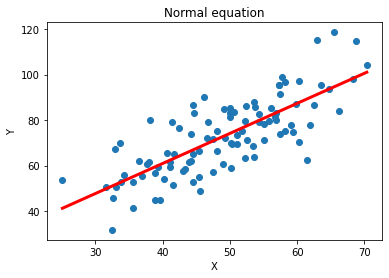

In [8]:
def viz_graph(a, B, X, Y, title=None):
  Y_p = B*X + a

  plt.scatter(X, Y) 
  plt.plot([min(X), max(X)], [min(Y_p), max(Y_p)], color='red', linewidth=3) 
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(title)
  plt.show()

viz_graph(a, B, X, Y, title="Normal equation")

In [9]:
def update_weights(m, c, n, L=0.0001):

  D_m = 0
  D_c = 0
  for i in range(n):
    D_m += 2/n * (Y[i] - m*X[i] - c) * -X[i]
    D_c += 2/n * (Y[i] - m*X[i] - c) * -1

  m -= L * D_m 
  c -= L * D_c

  return m,c

m = 0
c = 0
for i in range(100):
  old_m, old_c = m, c
  m , c = update_weights(m , c, len(Y))
  print(f"Updated m={m} and c={c}")

  if abs(m - old_m) < 0.0001 and abs(c - old_c) < 0.0001:
    break
print(f"Final m={m} and c={c}")


Updated m=0.7370702973591053 and c=0.014547010110737297
Updated m=1.1067954543515157 and c=0.02187396295959641
Updated m=1.2922546649131115 and c=0.025579224321293136
Updated m=1.3852832556512449 and c=0.027467789559144355
Updated m=1.4319472323843203 and c=0.028445071981738963
Updated m=1.4553540088980408 and c=0.02896524076647862
Updated m=1.4670946177201354 and c=0.0292561141260467
Updated m=1.4729832982243762 and c=0.029431969163807126
Updated m=1.4759365618962286 and c=0.02955012902438307
Updated m=1.47741737554838 and c=0.029639347874732387
Updated m=1.4781595857319894 and c=0.02971404924522704
Updated m=1.4785313011122556 and c=0.029781468199526515
Updated m=1.4787171706313593 and c=0.02984523395633241
Updated m=1.47880981702566 and c=0.029907166987310232
Final m=1.47880981702566 and c=0.029907166987310232


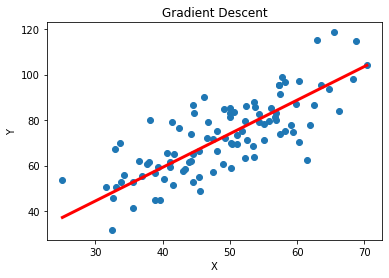

In [10]:
viz_graph(c, m, X, Y, title="Gradient Descent")

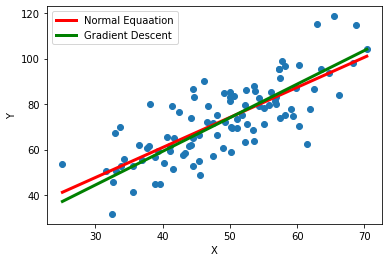

In [11]:
Y_p_1 = B*X + a
Y_p_2 = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_p_1), max(Y_p_1)], color='red', linewidth=3, label="Normal Equaation") 
plt.plot([min(X), max(X)], [min(Y_p_2), max(Y_p_2)], color='green', linewidth=3, label="Gradient Descent") 
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Exercise 2

In [12]:
dataframe_2 = pd.read_csv("chicago_hotel_reviews.csv")

print(dataframe_2)

     Unnamed: 0  ...    rating
0             0  ...  4.672131
1             1  ...  4.601329
2             2  ...  4.696296
3             3  ...  4.595455
4             4  ...  4.645000
..          ...  ...       ...
152         152  ...  1.000000
153         153  ...  1.850000
154         154  ...  1.700000
155         155  ...  1.000000
156         156  ... -1.000000

[157 rows x 4 columns]


In [13]:
x = dataframe_2.iloc[:,:3]
rating = dataframe_2.iloc[:,3]

print(x)
print(rating)

     Unnamed: 0  ...                                             review
0             0  ...  \tWonderful\tI had a sore throat and the hotel...
1             1  ...  Nov 20 2009 \tDidn't want to check out...\tPer...
2             2  ...  \tWOW!!\tGreat hotel! Stayed there with my wif...
3             3  ...  \tStaff Went Above \tWhile waiting for our gue...
4             4  ...  \tWonderful Hotel Will Definately Stay Here Ag...
..          ...  ...                                                ...
152         152  ...  Nov 9 2009 \tDon't Stay Here\tI live across th...
153         153  ...  Oct 14 2009 \tBates Motel\tI've stayed at some...
154         154  ...  Sep 21 2009 \tSlum\tNot only are the rooms jac...
155         155  ...  Feb 9 2009\tNasty business going on in this ro...
156         156  ...                                        placeholder

[157 rows x 3 columns]
0      4.672131
1      4.601329
2      4.696296
3      4.595455
4      4.645000
         ...   
152    1.000000


In [14]:
# Split data into train and test
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(review, rating,test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(x, rating, test_size=0.2)

In [15]:
review_train = X_train["review"]
review_test = X_test["review"]

# review_train
# review_test

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
tfidf_vec = TfidfVectorizer() 
 
tfidf_vec_matrix = tfidf_vec.fit_transform(review_train)

tfidf_array = tfidf_vec_matrix.toarray()

tfidf_tokens = tfidf_vec.get_feature_names()

tfidf_dataframe = pd.DataFrame(data = tfidf_array, columns = tfidf_tokens)

# print(tfidf_dataframe.apply(lambda col: col.unique()))
print(tfidf_dataframe)

      00        10       100  105  10min  ...      your  yourself  zephyr  zero  zoo
0    0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0     0.0   0.0  0.0
1    0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0     0.0   0.0  0.0
2    0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0     0.0   0.0  0.0
3    0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0     0.0   0.0  0.0
4    0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0     0.0   0.0  0.0
..   ...       ...       ...  ...    ...  ...       ...       ...     ...   ...  ...
120  0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0     0.0   0.0  0.0
121  0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0     0.0   0.0  0.0
122  0.0  0.022406  0.030479  0.0    0.0  ...  0.102842       0.0     0.0   0.0  0.0
123  0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0     0.0   0.0  0.0
124  0.0  0.000000  0.000000  0.0    0.0  ...  0.000000       0.0

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('tfidf', TfidfVectorizer() ), ('linear reg', LinearRegression())])

# Fit and predict regressor
pipeline.fit(review_train, y_train)
predicted = pipeline.predict(review_test)

prediction_df = pd.DataFrame({"Actual": y_test, "Predicted":predicted})
prediction_df

,Actual,Predicted
76,3.950311,4.126650
61,4.472727,3.876019
112,3.307692,3.542086
34,4.257807,4.315561
68,4.286667,3.728382
47,5.000000,4.204578
124,4.600000,0.966667
83,3.861794,3.752331
94,3.833333,3.959742
145,3.257143,3.456532


In [18]:
# Calculate MSE
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"MSE is {mean_squared_error(y_test, predicted)}")

MSE is 1.706424923181797


In [19]:
from sklearn.feature_selection import SelectPercentile, f_regression

pipeline_new = Pipeline([('tfidf', TfidfVectorizer() ), ('select percentile', SelectPercentile(f_regression, percentile = 20)), ('linear reg', LinearRegression())])

# Fit and predict regressor
pipeline_new.fit(review_train, y_train)
predicted = pipeline_new.predict(review_test)

prediction_df = pd.DataFrame({"Actual": y_test, "Predicted":predicted})
prediction_df

,Actual,Predicted
76,3.950311,4.069641
61,4.472727,3.000479
112,3.307692,3.247161
34,4.257807,4.431921
68,4.286667,3.643203
47,5.000000,4.031387
124,4.600000,0.966667
83,3.861794,3.762590
94,3.833333,2.994093
145,3.257143,3.970798


In [20]:
# Calculate MSE
from sklearn.metrics import accuracy_score, mean_squared_error
print(f"MSE is {mean_squared_error(y_test, predicted)}")

MSE is 1.8322879839685293
